# Wstęp do multimediów - Laboratorium 1

```
Bartłomiej Krawczyk
310774

Grupa 103
```

# Funkcje pomocnicze

In [176]:
import numpy as np
from matplotlib import pyplot as plt
from typing import List
from numpy import typing as npt

Zdefiniowałem funkcje wykorzystywane do wyliczania widma, widma amplitudowego i widma fazowego sygnału dyskretnego (zdefiniowanego jako lista wartości).

In [177]:
def calculate_spectrum(signal: List[float]) -> npt.NDArray[np.cdouble]:
    return np.fft.fft(signal) # type: ignore

In [178]:
def calculate_amplitude_spectrum(signal: List[float]) -> npt.NDArray[np.float64]:
    spectrum = calculate_spectrum(signal)
    return np.abs(spectrum)


In [179]:
def calculate_phase_spectrum(signal: List[float])  -> npt.NDArray[np.float64]:
    spectrum = calculate_spectrum(signal)
    return np.angle(spectrum) # type: ignore


# Zadanie 1
Dane są dwa sygnały o okresie podstawowym `N = 4`:
- `s1 = {2,0,1,3}`
- `s2 = {1,0,3,0}`

In [180]:
period = 4
signal_1 = [2.0, 0.0, 1.0, 3.0]
signal_2 = [1.0, 0.0, 3.0, 0.0]

### a) Dla każdego sygnału:
- wyznaczyć i wykreślić widmo amplitudowe i fazowe, 
- obliczyć moc sygnału 
- sprawdzić słuszność twierdzenia Parsevala.

In [181]:
def signal_description_1(signal: List[float]) -> None:
    
    amplitude_spectrum = calculate_amplitude_spectrum(signal)
    plt.stem(amplitude_spectrum) # type: ignore
    plt.title("Amplitude Spectrum")
    plt.show()
    
    phase_spectrum = calculate_phase_spectrum(signal)
    plt.stem(phase_spectrum) # type: ignore
    plt.title("Phase Spectrum")
    plt.show()

    power = calculate_power(signal)
    print(f'{power = }')
    perseval = calculate_perseval(signal)
    print(f'{(power * len(signal)) = }')
    print(f'{perseval = }\n')

    print(f'{(sum([x ** 2 for x in signal]) == perseval) = }')


In [182]:
def calculate_power(signal: List[float]) -> float:
    return sum([x ** 2 for x in signal]) / len(signal)


In [183]:
def calculate_perseval(signal: List[float]) -> float:
    spectrum = calculate_spectrum(signal)
    return sum([np.abs(x) ** 2 for x in spectrum]) / len(signal)


### Dane wyznaczone dla 1 sygnału

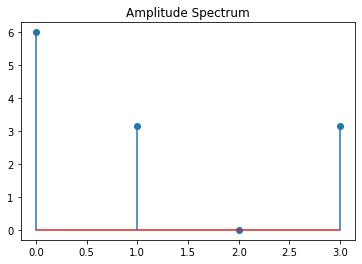

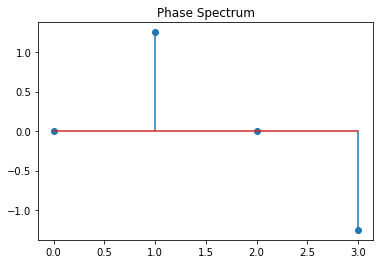

power = 3.5
(power * len(signal)) = 14.0
perseval = 14.0

(sum([x ** 2 for x in signal]) == perseval) = True


In [184]:
signal_description_1(signal_1)

### Dane wyznaczone dla 2 sygnału

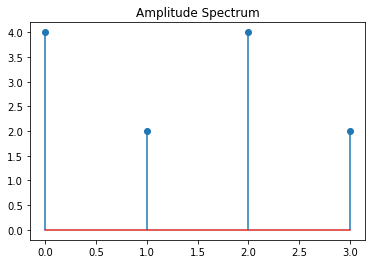

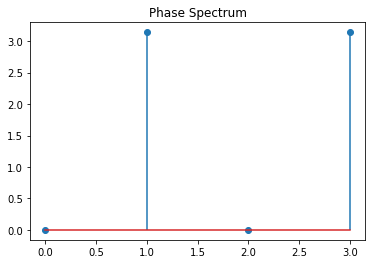

power = 2.5
(power * len(signal)) = 10.0
perseval = 10.0

(sum([x ** 2 for x in signal]) == perseval) = True


In [185]:
signal_description_1(signal_2)

Dla powyższych przykładów twierdzenie Parsevala jest prawdziwe.

### b) Sprawdzić słuszność twierdzenia o dyskretnej transformacji Fouriera splotu kołowego sygnałów `s1` i `s2`: 
- wyznaczyć ręcznie splot kołowy sygnałów `s1` i `s2`, 
- a następnie wyznaczyć ten splot ponownie za pomocą dyskretnej transformacji Fouriera.

Metoda "ręcznego" wyznaczania splotu kołowego:

In [186]:
def calculate_circular_convolution(signal_1: List[float], signal_2: List[float]) -> List[float]:
    assert(len(signal_1) == len(signal_2))

    convolution = [0.0] * len(signal_1)

    for n in range(len(convolution)):
        for m in range(len(convolution)):
            convolution[n] += signal_1[m] * signal_2[n - m]
            
    return convolution

Metoda wyznaczania splotu kołowego za pomocą dyskretnej transformacji Fouriera:

In [187]:
def calculate_circular_convolution_fft(signal_1: List[float], signal_2: List[float]) -> npt.NDArray[np.cdouble]:
    return np.fft.ifft(np.fft.fft(signal_1) * np.fft.fft(signal_2)) # type: ignore

In [188]:
convolution_by_hand = calculate_circular_convolution(signal_1, signal_2)
convolution_fft = calculate_circular_convolution_fft(signal_1, signal_2)
print(f'{convolution_by_hand = }')
print(f'{convolution_fft = }')

print(f'{(convolution_by_hand == convolution_fft) = }') # type: ignore

convolution_by_hand = [5.0, 9.0, 7.0, 3.0]
convolution_fft = array([5.+0.j, 9.+0.j, 7.+0.j, 3.+0.j])
(convolution_by_hand == convolution_fft) = array([ True,  True,  True,  True])


Metoda "ręczna" wyznaczania splotu kołowego sygnałów oraz ta za pomocą dyskretnej transformacji Fouriera produkują takie same wyniki.

# Zadanie 2
Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego sygnału harmonicznego:

`s(n) = A sin(2 pi n / N)`
- o amplitudzie `A = 4`
- i okresie podstawowym `N = 52`.

W tym celu dla każdej wartości:
- `no = {0, N/4, N/2, 3N/4}`

wykreślić widmo amplitudowe i fazowe przesuniętego sygnału `s(n - no)`. 

Skomentować otrzymane wyniki.

In [189]:
A = 4
N = 52
signal = [A * np.sin(2 * np.pi * n / N) for n in range(N)]

In [190]:
def signal_description_2(signal: List[float]) -> None:
    spectrum = calculate_spectrum(signal)

    amplitude_spectrum = calculate_amplitude_spectrum(signal)
    phase_spectrum = calculate_phase_spectrum(signal)

    for i in range(len(spectrum)):
        if np.abs(phase_spectrum[i]) < 1e-6:
            phase_spectrum[i] = 0
            
        if amplitude_spectrum[i] < 1e-6:
            amplitude_spectrum[i] = 0
            phase_spectrum[i] = 0
        

    plt.stem(amplitude_spectrum) # type: ignore
    plt.title('Amplitude Spectrum')
    plt.show()

    plt.stem(phase_spectrum) # type: ignore
    plt.title('Phase Spectrum')
    plt.show()


In [191]:
def shift_signal(signal: List[float], index: int) -> List[float]:
    return signal[index:] + signal[:index]

### Widmo amplitudowe i fazowe sygnału s(n) przesuniętego o 0

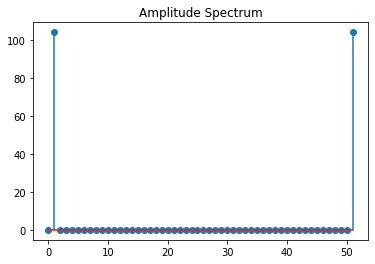

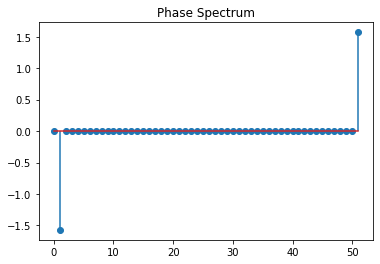

In [192]:
signal_description_2(shift_signal(signal, 0))

### Widmo amplitudowe i fazowe sygnału s(n) przesuniętego o N/4

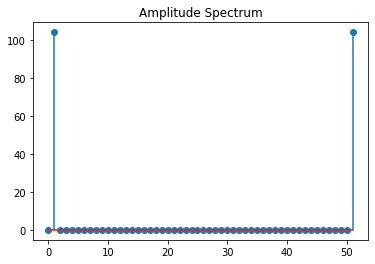

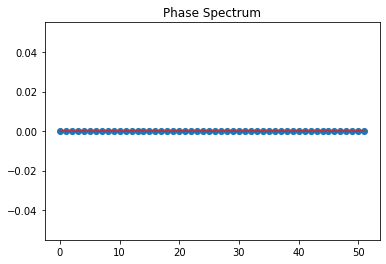

In [193]:
signal_description_2(shift_signal(signal, N // 4))

### Widmo amplitudowe i fazowe sygnału s(n) przesuniętego o N/2

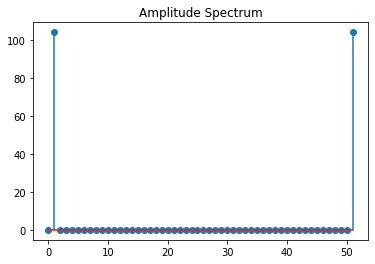

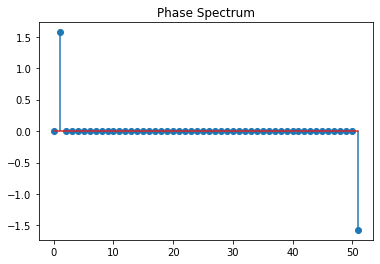

In [194]:
signal_description_2(shift_signal(signal, N // 2))

### Widmo amplitudowe i fazowe sygnału s(n) przesuniętego o 3N/4

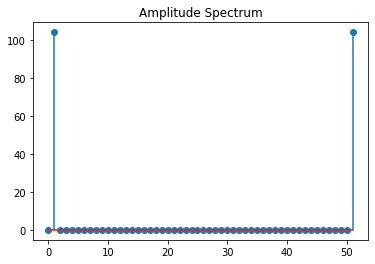

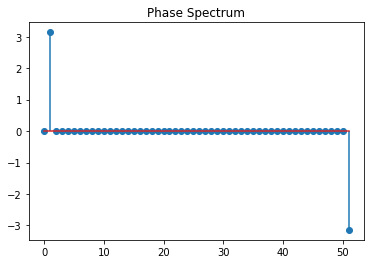

In [195]:
signal_description_2(shift_signal(signal, 3 * N // 4))

## Wnioski

Osiągnięte wyniki zdają się zgadzać ze wzorem na przesunięcie sygnału w dziedzinie czasu:

`x(n - no) <-DFT-> X(k) * e ^ (-j * k * (2pi/N) * no)`

gdzie

`x(n) <-DFT-> X(k)`

### Wpływ na widmo amplitudowe:

Przesunięcie w dziedzinie czasu nie powoduje zmiany widma amplitudowego, ponieważ widmo (liczbę zespoloną) obracamy jedynie wokół punktu `0 + 0j` (odpowiada za to potęga liczby `e`), a amplituda to odległość tego widma od tego punktu.

### Wpływ na widmo fazowe:

Widmo fazowe zmienia się wraz z przesunięciem w dziedzinie czasu.

Z wzoru wynika, że dla kolejnych wartości przesunięcia `{0, N/4, N/2, 3N/4}` widmo fazowe powinno być przesunięte o `k * pi/2` i tak właśnie wychodzi na wykresach.

```
e^0 = 1
e^(-jk * pi/2) = (-j) ^ k
e^(-jk * pi) = (-1) ^ k
e^(-jk * 3pi/2) = (j) ^ k
```
### Sprawdzenie czy wyniki zgadzają się z teorią w punktach widma różnych od 0 + 0j

dla k = 1 widmo fazowe kolejno przyjmuje wartości (przesunięte o pi/2):

-pi/2 => 0 => pi/2 => pi

a dla k = N - 1 widmo fazowe kolejno przyjmuje wartości (przesunięte o 3pi/2):

pi/2 => 0 => -pi/2 => -pi

# Zadanie 3
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego sygnału:

`s(n) = A (n mod N) / N`
- o amplitudzie A = 3 
- i okresie podstawowym N = 11.

W tym celu dla każdej wartości 

`No = { 0, 1N, 4N, 9N }` 

wykreślić widmo amplitudowe i fazowe sygnału `s(n)`dopełnionego `No` zerami. 

Skomentować otrzymane wyniki.

In [196]:
A = 3 # type: ignore
N = 11  # type: ignore
signal = [A * (n % N) / N for n in range(N)]

In [197]:
def signal_description_3(signal: List[float]) -> None:

    amplitude_spectrum = calculate_amplitude_spectrum(signal)
    plt.stem(amplitude_spectrum)  # type: ignore
    plt.title('Amplitude Spectrum')
    plt.show()

    phase_spectrum = calculate_phase_spectrum(signal)
    plt.stem(phase_spectrum)  # type: ignore
    plt.title('Phase Spectrum')
    plt.show()

In [198]:
def add_zeros(signal: List[float], zeros: int) -> List[float]:
    return signal + [0.0] * zeros

### Wykresy widma amplitudowego i fazowego sygnału s(n) dopełnionego 0 zerami

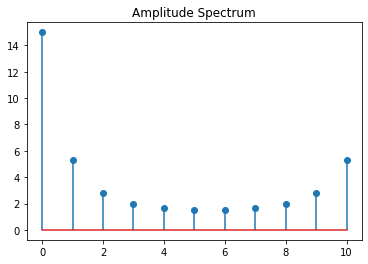

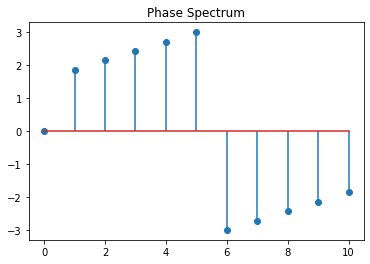

In [199]:
signal_description_3(add_zeros(signal, 0))

### Wykresy widma amplitudowego i fazowego sygnału s(n) dopełnionego N zerami

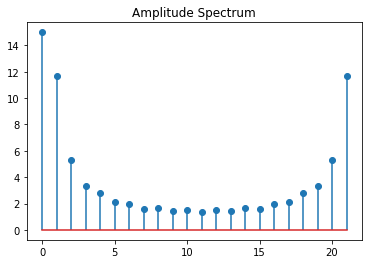

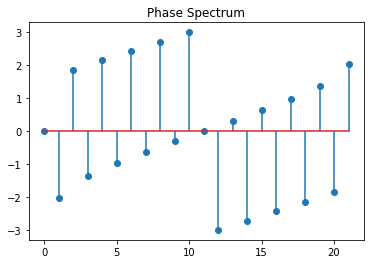

In [200]:
signal_description_3(add_zeros(signal, N))

### Wykresy widma amplitudowego i fazowego sygnału s(n) dopełnionego 4N zerami

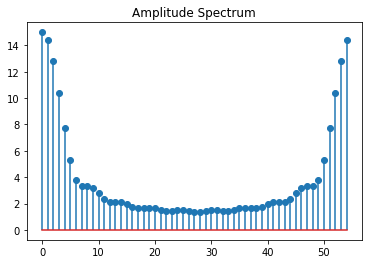

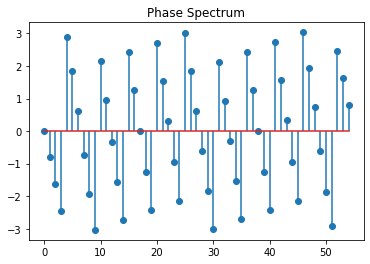

In [201]:
signal_description_3(add_zeros(signal, 4 * N))


### Wykresy widma amplitudowego i fazowego sygnału s(n) dopełnionego 9N zerami

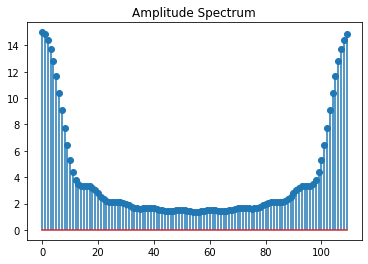

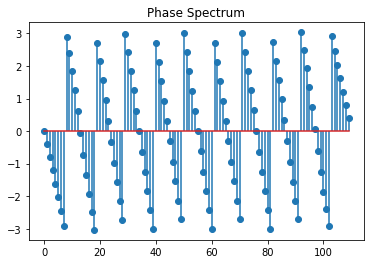

In [202]:
signal_description_3(add_zeros(signal, 9 * N))

## Wnioski

Dopełnienie sygnału zerami zwiększa liczbę próbek widmowych przypadająca na jeden okres widma `(added_zeros + N)` razy. Otrzymane widma są bardziej "zagęszczone".

Nie dostajemy większej ilości danych (bo wartości będą interpolowane), ale uzupełniając sygnał zerami jesteśmy w stanie zwiększayć rozdzielczość wyliczanej dyskretnej transformaty Fouriera.

# Zadanie 4
Dany jest sygnał rzeczywisty 

`s(t) = A1 sin(2 pi f1 t) + A2 sin(2 pi f2 t) + A3 sin(2 pi f3 t)`,

gdzie 
- `A1 = 0.3`, `f1 = 5000 Hz`, 
- `A2 = 0.4`, `f2 = 6000 Hz`, 
- `A3 = 0.5`, `f3 = 11000 Hz`. 

Przy założeniu, że częstotliwość próbkowania wynosi `fs = 48000 Hz`, a liczba próbek sygnału wynosi `N1 = 2048` , przedstawić wykres
widmowej gęstości mocy sygnału `s(t)`.

Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma? 

Czy sytuacja uległaby zmianie dla liczby próbek `N2 = 3 * N1 / 2`?

Odpowiedź uzasadnić.

In [203]:
A1 = 0.3
f1 = 5000

A2 = 0.4
f2 = 6000

A3 = 0.5
f3 = 11000

fs = 48000

N1 = 2048
N2 = 3 * N1 // 2

In [204]:
def signal_val(t: float):
    return  A1 * np.sin(2 * np.pi * f1 * t) + \
            A2 * np.sin(2 * np.pi * f2 * t) + \
            A3 * np.sin(2 * np.pi * f3 * t)


Maksymalną częstotliwością jest:

fm = 11000 Hz

Z tego wynika, że częstotliwość Nyquista to:

fN = 22000 Hz

Warunek Nyquista jest spełniony:

fs > fN

Poszczególne segmenty widma nie nachodzą na siebie. Możliwe jest odtworzenie sygnału analogowego z ciągu próbek.

In [205]:
def calculate_magnitude(signal: List[float]) -> List[float]:
    # Note: 
    # According to numpy.fft.rfft docs
    # This function does not compute the negative frequency terms
    # So we have to multiply all values by 2 (except the first one)
    # or calculate numpy.fft.fft and add negative terms to positive ones
    
    value = [
        2 * np.abs(val) / len(signal)  # type: ignore
        for val in np.fft.rfft(signal)  # type: ignore
    ]
    value[0] = value[0] / 2

    return value


In [206]:
def signal_description_4(signal: List[float]) -> None:
    values = calculate_magnitude(signal)
    delta_f = fs / len(signal)
    plt.stem([i * delta_f for i in range(len(values))], values)  # type: ignore
    plt.show()
    plt.psd(signal, Fs = fs)
    plt.show()
    plt.magnitude_spectrum(signal, Fs = fs, sides='twosided')
    plt.show()


### Wykres widmowej gęstości mocy spróbkowanego sygnału s(t) przy liczbie próbek równej N1 = 2048

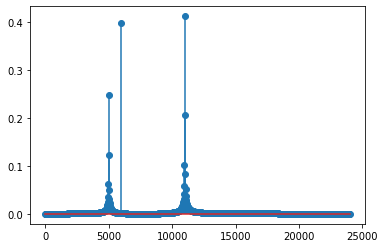

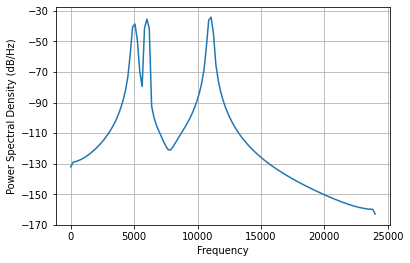

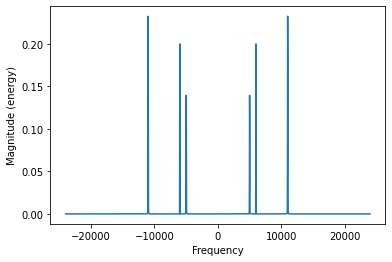

In [207]:
signal_description_4([signal_val(n / fs) for n in range(N1)])

### Wykres widmowej gęstości mocy spróbkowanego sygnału s(t) przy liczbie próbek równej N2 = 3072

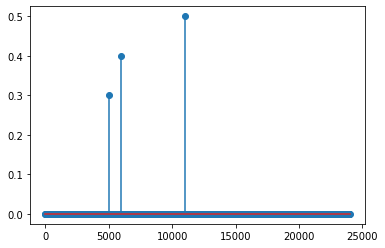

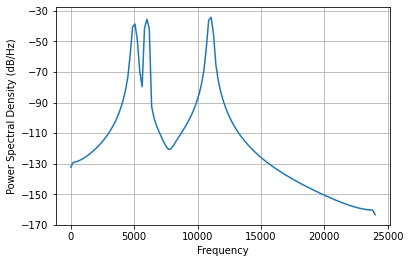

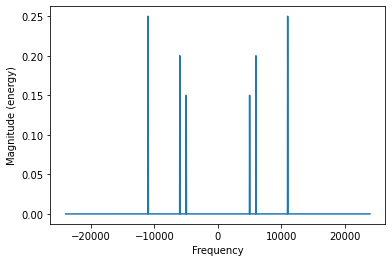

In [208]:
signal_description_4([signal_val(n / fs) for n in range(N2)])

### Dodatkowe obliczenia

In [209]:
frequency = np.gcd.reduce([f1, f2, f3]) # type: ignore
window = fs / frequency # (1 / frequency) / (1 / fs)
print(f'{window = }')
print(f'{(N1 % window == 0) = }')
print(f'{(N2 % window == 0) = }')

window = 48.0
(N1 % window == 0) = False
(N2 % window == 0) = True


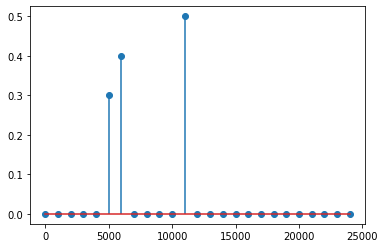

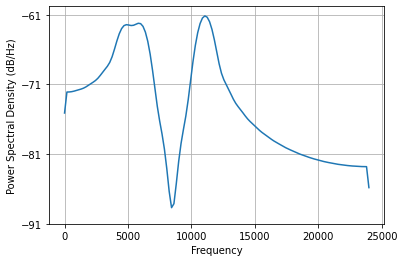

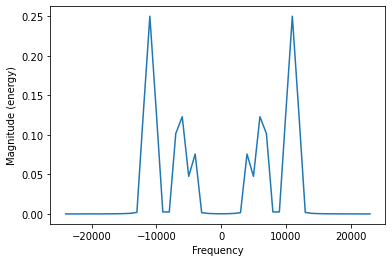

In [210]:
signal_description_4([signal_val(n / fs) for n in range(int(window))])

### Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma? 

Tak, moc z 3 prążków "rozlewa" się na inne częstotliwości.

### Czy sytuacja uległaby zmianie dla liczby próbek `N2 = 3 * N1 / 2`?

Tak, sytuacja ulega zmianie. Liczba N2 = 3072 jest podzielna przez zmienną `window` (48) dla danej częstotliwości `fs`.

### Wnioski

Przecieki widma są spowodowane nieciągłością przy zapętleniu okna analizy.

Aby zapobiec przeciekowi widma, należy skończyć próbkowanie w tym samym miejscu okresu sygnału co zaczeliśmy próbkowanie.